1. Instead of full code, write was changed each time. Describe what is changed.
2. flake8 my_file.py my function. All of them.
3. Develop the writing.

4. Conclusion.

# Completing waffle plot function

Waffle plot is one of the best alternatives to piechart, and can be a diversifying addition to your dashboard or a report. In my job I am trying to kill every single pie chart there is (they are so overused they will survive anyway, don't worry), so I recently found myself in need of a Waffle plot function. There is no built-in function for that in matplotlib, and I couldn't use pywaffle.

There is no point in reinventing the wheel, so I opened the browser and went through the web. I found a few functions, but discounting pywaffle and an attempted use of squarify, another third party library, there seemed to be only one way to do this, copied many times over by different people. Some of them added things to it, but it was mostly the same code, originally posted by Justin Fletcher on 3 Jan 2017 on Stack Overflow. It is a brilliant piece of code, however, as the author states clearly, it is not finished. So unfortunately, instead of having a solution straight away, some work was required to complete it. But the code I found was indeed a very good start.

Getting it to work was an interesting process, so I decided to document it here in hopes the way of thinking and the steps can help people in a similar situation. If you are here just for the function, just scroll to the bottom, or you can take it from Stack Overflow or my Github.

A starting note, I worked on the following:

# My specs

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import platform
print('python version:', platform.python_version())
print('numpy version:', np.__version__)
print('matplotlib version:', mpl.__version__)

python version: 3.10.7
numpy version: 1.23.4
matplotlib version: 3.6.0


The final product:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values,
                width=10, 
                height=10,
                cmap=plt.cm.viridis,
                c=None,
                bc = 'w',
                autoscale=True,
                over_represent = False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign = '',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):

    """
    Parameters:

    values: str
        Name of the column in dataframe contaning values.
    categories: str
        Name of the column in dataframe containing categories.
    width: int, default 10
        Width of the plot in patches (squares).
    height: int, default 10
        Width of the plot in patches (squares).
    c: list, default ['b', 'g', 'r', 'c', 'm', 'y',  'k', 'w']
        List of discreet colours that will be used to create colormap and Legend.
    bc: str, list or tuple, default 'w'
        Background color. It also controls color of the grid.
    autoscale: bool, default True
        If autoscale is on, the number of patches will grow until it can
        accomodate the smallest non-zero value from values.
    over_represent: bool, default False
        Works if autoscale is True, otherwise has no effect.
        If the smallest category has one tile and fills less than 50% of it, 
        if over_represent is True, the tile will still have the category color.
        If over_represent is False, the tile will have the color of the 
        background.
    vertical: bool, default True
        Alignment of tiles in the waffle. If set to False, alignment is horizontal.
    label_v: bool, default True
        Label value - when True, it add value in brackets to the legend.
        If value contains % sign, it will add it to the Legend.
    label_p: bool, default False
        Label percentage - when True, the function calculates the percentage 
        of the value and adds it in brackets to the legend.
        When both label_v and label_p are True, it will add both, value after
        colon and percentage in brackets.
    legend_ncols: int, default 1
        Legend control, it allows to put categories in more than one column. 
        To make flat horizontal Legend, it should equal the number of categories.
    figsize: tuple, default (6.4, 4.8)
        Size of the whole figure.
    font: str, default 'DejaVu Sans'
        Specifies font used in the legend.
    save: str or path object, default None
        Specifies the location to which the file will be saved. If None,
        plt.show() is used instead.
    """

    # stacking arrays into one matrix
    a = np.vstack((categories, values)) # if you want colors assign to categories, you can add c here as well

    # Transposing into dataframe-like format
    a = a.transpose()

    # Sorting the array by value, descending
    a = a[a[:, 1].argsort()[::-1]]

    # Getting sorted categories and values
    categories = a[:, 0]
    values = a[:, 1]

    # Getting number of categories
    n_categories = a[:, 0].size

    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]


    # autoscaling

    if autoscale:
        
        # condition variable for 'while' loop
        condition=False

        while condition is not True:

            total = width * height

            tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

            # Make a dummy matrix for use in plotting.
            waffle = np.zeros((height, width))

            # Popoulate the dummy matrix with integer values.
            category_index = 0
            tile_index = 0

            if vertical:
                # Iterate over each tile.
                for col in range(width):
                    for row in range(height):
                        tile_index += 1
                        

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row, col] = category_index


            if vertical is False:  
                # Iterate over each tile.
                for row in range(height):
                    for col in range(width):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row, col] = category_index

            if len(np.unique(waffle)) < len(proportions_cmap):
                condition = False
                width +=1
                height +=1

            else:
                condition = True
                    
    else:
        # if autoscale is off:

        total = width * height

        tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

        # Make a dummy matrix for use in plotting.
        waffle = np.zeros((height, width))

        # Popoulate the dummy matrix with integer values.
        category_index = 0
        tile_index = 0

        if vertical:
            # Iterate over each tile.
            for col in range(width):
                for row in range(height):
                    tile_index += 1


                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row, col] = category_index



        if vertical is False:  
            # Iterate over each tile.
            for row in range(height):
                for col in range(width):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row, col] = category_index


    # Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
    n_bins = np.count_nonzero(a[:, 1])
    
    
    if autoscale is False:
        # If number of unique values in waffle is smaller than number of bins, reduce number of bins
        if len(np.unique(waffle)) < n_bins:
            n_bins = len(np.unique(waffle))

    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]
    
    if not over_represent and len(c_for_cmap) == np.count_nonzero(a[:, 1]):
        for i in proportions_cmap:
            if i < 0.5 * (1 / (height*width)):
                c_for_cmap[-1] = bc

    if any(values) != 0:
        
        # Constructing colormap
        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c_for_cmap, N=n_bins)

        # Compute the portion of the total assigned to each category.
        proportions = [(float(value) / sum(values)) for value in values]

    else:
        proportions = [1 for v in values]

    # Grid line auto-adjustment
    if height < 25 and width < 25:
        linewidth = 1
    else:
        linewidth = 0.5

    # Create a new figure
    fig = plt.figure(figsize=figsize, facecolor=bc)
    ax = plt.gca()

    if len(c_for_cmap) > 1:
        # Visualisng the waffle array as waffle plot
        ax.matshow(waffle, cmap=cmap)
    else:
        # Visualisng the waffle array as waffle plot, only transparent
        ax.matshow(waffle, alpha=0)

    # With colours control, to not get an empty plot for only one not empty category,
    #a facecolor has to be set. Same for the special case of empty waffle.

    if len(c_for_cmap) < 1:
        ax.set_facecolor('lightgrey')
    elif len(c_for_cmap) < 2:
        ax.set_facecolor(c[0])

    # Minor ticks
    ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color=bc, linestyle='-', linewidth=linewidth)

    # Switch off the numbers associated with ticks
    plt.xticks([])
    plt.yticks([])

    # variables for the legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    #Empty list, that will be filled with legend handles
    legend_handles = []

    # Constructing the legend. Depending on the controls, it can have:

    # Values only, with the sign, or without it
    if label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category} ({values[i]}{value_sign})" 
            else:
                label_str = f"{category} ({value_sign}{values[i]})"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Values and percentages in brackets, calculated automatically
    if label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category}: {values[i]}{value_sign} ({proportions[i] * 100:.2f}%)"
            else:
                label_str = f"{category}: {value_sign}{values[i]} ({proportions[i] * 100:.2f}%)"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # only percentages calculated automatically
    if not label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category} ({proportions[i] * 100:.2f}%)" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Just the name of the category, no values and no percentages
    if not label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category}" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend
    l = ax.legend(handles=legend_handles, loc = 'lower center', ncol=legend_ncols,
              labelcolor=font_c, bbox_to_anchor=legend_loc)
    
    # Font controls for the legend
    plt.setp(l.texts, family=font)

    # Option to save an image
    if save is not None:
        plt.savefig(save, bbox_inches='tight', dpi=300)

    else:
        plt.show()

# no numpy

Changes proposed by ChatGPT:

In [ ]:
# stacking arrays into one matrix
a = [categories, values] # if you want colors assign to categories, you can add c here as well

# Transposing into dataframe-like format
a = list(map(list, zip(*a)))

# Sorting the array by value, descending
a = sorted(a, key=lambda x: x[1], reverse=True)

# Getting sorted categories and values
categories = [row[0] for row in a]
values = [row[1] for row in a]

# Getting number of categories
n_categories = len(categories)

In [ ]:
# Make a dummy matrix for use in plotting.
waffle = [[0 for col in range(width)] for row in range(height)]

In [ ]:
# Set the category value to an integer, which increases with category.
waffle[row][col] = category_index

In [ ]:
if len(set([item for sublist in waffle for item in sublist])) < len(proportions_cmap):
    condition = False
    width +=1
    height +=1

In [ ]:
# Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
n_bins = len([row[1] for row in a if row[1] != 0])

In [ ]:
if autoscale is False:
    # If number of unique values in waffle is smaller than number of bins, reduce number of bins
    if len(set([item for sublist in waffle for item in sublist])) < n_bins:
        n_bins = len(set([item for sublist in waffle for item in sublist]))

In [ ]:
if not over_represent and len(c_for_cmap) == len([row[1] for row in a if row[1] != 0]):
    for i in proportions_cmap:
        if i < 0.5 * (1 / (height*width)):
            c_for_cmap[-1] = bc

In [ ]:
# Minor ticks
ax.set_xticks([x - 0.5 for x in range(width)], minor=True)
ax.set_yticks([x - 0.5 for x in range(height)], minor=True)

In [ ]:
# variables for the legend
values_cumsum = [sum(values[:i+1]) for i in range(len(values))]

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values,
                width=10, 
                height=10, 
                cmap=plt.cm.viridis,
                c=None,
                bc = 'w',
                autoscale=True,
                over_represent = False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign = '',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):

    """
    Parameters:

    values: str
        Name of the column in dataframe contaning values.
    categories: str
        Name of the column in dataframe containing categories.
    width: int, default 10
        Width of the plot in patches (squares).
    height: int, default 10
        Width of the plot in patches (squares).
    c: list, default ['b', 'g', 'r', 'c', 'm', 'y',  'k', 'w']
        List of discreet colours that will be used to create colormap and Legend.
    bc: str, list or tuple, default 'w'
        Background color. It also controls color of the grid.
    autoscale: bool, default True
        If autoscale is on, the number of patches will grow until it can
        accomodate the smallest non-zero value from values.
    over_represent: bool, default False
        Works if autoscale is True, otherwise has no effect.
        If the smallest category has one tile and fills less than 50% of it, 
        if over_represent is True, the tile will still have the category color.
        If over_represent is False, the tile will have the color of the 
        background.
    vertical: bool, default True
        Alignment of tiles in the waffle. If set to False, alignment is horizontal.
    label_v: bool, default True
        Label value - when True, it add value in brackets to the legend.
        If value contains % sign, it will add it to the Legend.
    label_p: bool, default False
        Label percentage - when True, the function calculates the percentage 
        of the value and adds it in brackets to the legend.
        When both label_v and label_p are True, it will add both, value after
        colon and percentage in brackets.
    legend_ncols: int, default 1
        Legend control, it allows to put categories in more than one column. 
        To make flat horizontal Legend, it should equal the number of categories.
    figsize: tuple, default (6.4, 4.8)
        Size of the whole figure.
    font: str, default 'DejaVu Sans'
        Specifies font used in the legend.
    save: str or path object, default None
        Specifies the location to which the file will be saved. If None,
        plt.show() is used instead.
    """

    # stacking arrays into one matrix
    a = [categories, values] # if you want colors assign to categories, you can add c here as well

    # Transposing into dataframe-like format
    a = list(map(list, zip(*a)))

    # Sorting the array by value, descending
    a = sorted(a, key=lambda x: x[1], reverse=True)

    # Getting sorted categories and values
    categories = [row[0] for row in a]
    values = [row[1] for row in a]

    # Getting number of categories
    n_categories = len(categories)

    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]


    # autoscaling

    if autoscale:

        # condition variable for 'while' loop
        condition=False

        while condition is not True:

            total = width * height

            tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

            # Make a dummy matrix for use in plotting.
            waffle = [[0 for col in range(width)] for row in range(height)]

            # Popoulate the dummy matrix with integer values.
            category_index = 0
            tile_index = 0

            if vertical:
                # Iterate over each tile.
                for col in range(width):
                    for row in range(height):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):
                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index


            if vertical is False:  
                # Iterate over each tile.
                for row in range(height):
                    for col in range(width):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index

            if len(set([item for sublist in waffle for item in sublist])) < len(proportions_cmap):
                condition = False
                width +=1
                height +=1

            else:
                condition = True

    else:
        # if autoscale is off:

        total = width * height

        tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

        # Make a dummy matrix for use in plotting.
        waffle = [[0 for col in range(width)] for row in range(height)]

        # Popoulate the dummy matrix with integer values.
        category_index = 0
        tile_index = 0

        if vertical:
            # Iterate over each tile.
            for col in range(width):
                for row in range(height):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index



        if vertical is False:  
            # Iterate over each tile.
            for row in range(height):
                for col in range(width):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index


    # Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
    n_bins = len([row[1] for row in a if row[1] != 0])

    if autoscale is False:
        # If number of unique values in waffle is smaller than number of bins, reduce number of bins
        if len(set([item for sublist in waffle for item in sublist])) < n_bins:
            n_bins = len(set([item for sublist in waffle for item in sublist]))

    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]

    if not over_represent and len(c_for_cmap) == len([row[1] for row in a if row[1] != 0]):
        for i in proportions_cmap:
            if i < 0.5 * (1 / (height*width)):
                c_for_cmap[-1] = bc

    if any(values) != 0:

        # Constructing colormap
        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c_for_cmap, N=n_bins)

        # Compute the portion of the total assigned to each category.
        proportions = [(value / sum(values)) for value in values]

    else:
        proportions = [1 for v in values]

    # Grid line auto-adjustment
    if height < 25 and width < 25:
        linewidth = 1
    else:
        linewidth = 0.5

    # Create a new figure
    fig = plt.figure(figsize=figsize, facecolor=bc)
    ax = plt.gca()

    if len(c_for_cmap) > 1:
        # Visualisng the waffle array as waffle plot
        ax.matshow(waffle, cmap=cmap)
    else:
        # Visualisng the waffle array as waffle plot, only transparent
        ax.matshow(waffle, alpha=0)

    # With colours control, to not get an empty plot for only one not empty category,
    #a facecolor has to be set. Same for the special case of empty waffle.

    if len(c_for_cmap) < 1:
        ax.set_facecolor('lightgrey')
    elif len(c_for_cmap) < 2:
        ax.set_facecolor(c[0])

    # Minor ticks
    ax.set_xticks([x - 0.5 for x in range(width)], minor=True)
    ax.set_yticks([x - 0.5 for x in range(height)], minor=True)

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color=bc, linestyle='-', linewidth=linewidth)

    # Switch off the numbers associated with ticks
    plt.xticks([])
    plt.yticks([])

    # variables for the legend
    values_cumsum = [sum(values[:i+1]) for i in range(len(values))]
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    #Empty list, that will be filled with legend handles
    legend_handles = []

    # Constructing the legend. Depending on the controls, it can have:

    # Values only, with the sign, or without it
    if label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category} ({values[i]}{value_sign})" 
            else:
                label_str = f"{category} ({value_sign}{values[i]})"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Values and percentages in brackets, calculated automatically
    if label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category}: {values[i]}{value_sign} ({proportions[i] * 100:.2f}%)"
            else:
                label_str = f"{category}: {value_sign}{values[i]} ({proportions[i] * 100:.2f}%)"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # only percentages calculated automatically
    if not label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category} ({proportions[i] * 100:.2f}%)" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Just the name of the category, no values and no percentages
    if not label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category}" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend
    l = ax.legend(handles=legend_handles, loc = 'lower center', ncol=legend_ncols,
              labelcolor=font_c, bbox_to_anchor=legend_loc)
    
    # Font controls for the legend
    plt.setp(l.texts, family=font)

    # Option to save an image
    if save is not None:
        plt.savefig(save, bbox_inches='tight', dpi=300)

    else:
        plt.show()

This worked really well. The code was really great, it took a few seconds to get it. The function works the same way, it just need less libraries to work. ChatGPT made a mistake with set_ticks, and even though I couldn't make it to fix it, during the conversation it threw an idea of how to make it work, which when adjusted, finally worked. This saved me a lot of time.

I created the docstring for this function, and it was quite time consuming. I wonder if ChatGPT can create one for me?

# ChatGPT generated docstring

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values,
                width=10, 
                height=10, 
                cmap=plt.cm.viridis,
                c=None,
                bc = 'w',
                autoscale=True,
                over_represent = False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign = '',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):

    """
    Plots a waffle plot, which is a stacked bar plot with rectangular tiles that represent the proportions of different categories.

    Parameters
    ----------
    categories : list or numpy array
        A list or 1D array of category labels.
    values : list or numpy array
        A list or 1D array of values corresponding to the categories.
    width : int, optional
        The width of the waffle plot in number of tiles, by default 10.
    height : int, optional
        The height of the waffle plot in number of tiles, by default 10.
    cmap : matplotlib colormap, optional
        The colormap to use for generating colors for the categories, by default plt.cm.viridis.
    c : list, optional
        A list of colors to be used for the tiles of the different categories, by default None. If not provided, colors will be generated from the cmap.
    bc : str, optional
        The background color of the plot, by default 'w' (white).
    autoscale : bool, optional
        Whether to adjust the width and height of the plot to ensure that all categories are represented by at least one tile, by default True.
    over_represent : bool, optional
        Whether to over-represent the proportions by using extra tiles for the same category, by default False.
    vertical : bool, optional
        Whether to stack the tiles vertically (True) or horizontally (False), by default True.
    label_v : bool, optional
        Whether to label the tiles with the corresponding values, by default True.
    label_p : bool, optional
        Whether to label the tiles with the corresponding proportions, by default False.
    legend_ncols : int, optional
        The number of columns to use in the legend, by default 1.
    legend_loc : tuple, optional
        The location of the legend as a tuple of x and y coordinates, by default (1.35, 0.695).
    figsize : tuple, optional
        The size of the figure as a tuple of width and height in inches, by default (6.4, 4.8).
    value_sign : str, optional
        A string to be used as a suffix for the value labels, by default ''.
    font : str, optional
        The font to be used for the labels, by default 'DejaVu Sans'.
    font_c : str, optional
        The color of the font to be used for the labels, by default 'black'.
    save : str, optional
        The file name and path to save the plot to, by default None.

    Returns
    -------
    matplotlib.figure.Figure
        The figure object of the plot.
    """
    

    # stacking arrays into one matrix
    a = [categories, values] # if you want colors assign to categories, you can add c here as well

    # Transposing into dataframe-like format
    a = list(map(list, zip(*a)))

    # Sorting the array by value, descending
    a = sorted(a, key=lambda x: x[1], reverse=True)

    # Getting sorted categories and values
    categories = [row[0] for row in a]
    values = [row[1] for row in a]

    # Getting number of categories
    n_categories = len(categories)

    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]


    # autoscaling

    if autoscale:

        # condition variable for 'while' loop
        condition=False

        while condition is not True:

            total = width * height

            tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

            # Make a dummy matrix for use in plotting.
            waffle = [[0 for col in range(width)] for row in range(height)]

            # Popoulate the dummy matrix with integer values.
            category_index = 0
            tile_index = 0

            if vertical:
                # Iterate over each tile.
                for col in range(width):
                    for row in range(height):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):
                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index


            if vertical is False:  
                # Iterate over each tile.
                for row in range(height):
                    for col in range(width):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index

            if len(set([item for sublist in waffle for item in sublist])) < len(proportions_cmap):
                condition = False
                width +=1
                height +=1

            else:
                condition = True

    else:
        # if autoscale is off:

        total = width * height

        tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

        # Make a dummy matrix for use in plotting.
        waffle = [[0 for col in range(width)] for row in range(height)]

        # Popoulate the dummy matrix with integer values.
        category_index = 0
        tile_index = 0

        if vertical:
            # Iterate over each tile.
            for col in range(width):
                for row in range(height):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index



        if vertical is False:  
            # Iterate over each tile.
            for row in range(height):
                for col in range(width):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index


    # Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
    n_bins = len([row[1] for row in a if row[1] != 0])

    if autoscale is False:
        # If number of unique values in waffle is smaller than number of bins, reduce number of bins
        if len(set([item for sublist in waffle for item in sublist])) < n_bins:
            n_bins = len(set([item for sublist in waffle for item in sublist]))

    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]

    if not over_represent and len(c_for_cmap) == len([row[1] for row in a if row[1] != 0]):
        for i in proportions_cmap:
            if i < 0.5 * (1 / (height*width)):
                c_for_cmap[-1] = bc

    if any(values) != 0:

        # Constructing colormap
        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c_for_cmap, N=n_bins)

        # Compute the portion of the total assigned to each category.
        proportions = [(value / sum(values)) for value in values]

    else:
        proportions = [1 for v in values]

    # Grid line auto-adjustment
    if height < 25 and width < 25:
        linewidth = 1
    else:
        linewidth = 0.5

    # Create a new figure
    fig, ax = plt.subplots(figsize=figsize, facecolor=bc)

    if len(c_for_cmap) > 1:
        # Visualisng the waffle array as waffle plot
        ax.matshow(waffle, cmap=cmap)
    else:
        # Visualisng the waffle array as waffle plot, only transparent
        ax.matshow(waffle, alpha=0)

    # With colours control, to not get an empty plot for only one not empty category,
    #a facecolor has to be set. Same for the special case of empty waffle.

    if len(c_for_cmap) < 1:
        ax.set_facecolor('lightgrey')
    elif len(c_for_cmap) < 2:
        ax.set_facecolor(c[0])

    # Minor ticks
    ax.set_xticks([x - 0.5 for x in range(width)], minor=True)
    ax.set_yticks([x - 0.5 for x in range(height)], minor=True)

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color=bc, linestyle='-', linewidth=linewidth)

    # Switch off the numbers associated with ticks
    plt.xticks([])
    plt.yticks([])

    # variables for the legend
    values_cumsum = [sum(values[:i+1]) for i in range(len(values))]
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    #Empty list, that will be filled with legend handles
    legend_handles = []

    # Constructing the legend. Depending on the controls, it can have:

    # Values only, with the sign, or without it
    if label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category} ({values[i]}{value_sign})" 
            else:
                label_str = f"{category} ({value_sign}{values[i]})"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Values and percentages in brackets, calculated automatically
    if label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category}: {values[i]}{value_sign} ({proportions[i] * 100:.2f}%)"
            else:
                label_str = f"{category}: {value_sign}{values[i]} ({proportions[i] * 100:.2f}%)"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # only percentages calculated automatically
    if not label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category} ({proportions[i] * 100:.2f}%)" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Just the name of the category, no values and no percentages
    if not label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category}" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend
    l = ax.legend(handles=legend_handles, loc = 'lower center', ncol=legend_ncols,
              labelcolor=font_c, bbox_to_anchor=legend_loc)
    
    # Font controls for the legend
    plt.setp(l.texts, family=font)

    # Option to save an image
    if save is not None:
        plt.savefig(save, bbox_inches='tight', dpi=300)

    else:
        plt.show()

Turns out, it can! And it's almost the same as mine, a little bit less detailed. With a few minor adjustments, it would be be really good. Asking ChatGPT to create docstring also can save a lot of time.

# Optimisation done by ChatGPT

I've asked ChatGPT how would it optimize the function.

In [ ]:
It gave me a few very good ideas:

1. Instead of using map to transpose a, you can use list comprehension: a = [[row[i] for row in a] for i in range(2)].
2. You can use heapq.nlargest to sort a by value, instead of using sorted.
3. Instead of using a while loop, you can use for loop and break to exit the loop when condition is True.
4. You can avoid creating a new list indexes in the for loop by using enumerate instead.
5. You can use zip to iterate over categories and colors in the same loop.
6. You can use set to store the unique values of colors, instead of using a list.
7. You can use a generator expression to compute c: c = (cmap(x) for x in range(len(categories)))

1. Instead of using map to transpose a, you can use list comprehension: a = [[row[i] for row in a] for i in range(2)].
2. You can use heapq.nlargest to sort a by value, instead of using sorted.
3. You can use a generator expression to compute proportions_cmap: proportions_cmap = ((value / sum(values)) for value in values if value > 0).
4. Instead of using a while loop, you can use for loop and break to exit the loop when condition is True.
5. You can avoid creating a new list indexes in the for loop by using enumerate instead.
6. You can use zip to iterate over categories and colors in the same loop.
7.  You can use set to store the unique values of colors, instead of using a list.

1. You can avoid creating unnecessary intermediate lists by performing the sorting and assignment of categories and values in one step:

In [ ]:
a = sorted(a, key=lambda x: x[1], reverse=True)
categories, values = zip(*a)

2. Instead of using map to transpose the a list and then using a list comprehension to extract the categories and values, you can use a list comprehension directly on a:

In [ ]:
categories, values = zip(*sorted(a, key=lambda x: x[1], reverse=True))

3. You can replace the list comprehension to create the c list with a call to cmap.colors:

In [ ]:
c = cmap.colors if c is None else c

4. Instead of using a list comprehension to create the legend_labels list, you can use a generator expression inside of the call to join:

5. You can use the zip function to iterate over categories and values at the same time, rather than using indexing:

In [ ]:
for i, (cat, val) in enumerate(zip(categories, values)):

6. Instead of using a nested for loop to create the patches list, you can use a list comprehension:

In [ ]:
patches = [mpatches.Rectangle((x, y), 1, 1, facecolor=c[i]) for x in range(width) for y in range(height) if (x + y*width) < round(val*autoscale_factor)]

7. You can use the PatchCollection class from matplotlib.collections to add the patches to the plot more efficiently, rather than using a for loop to add them one at a time.

In [ ]:
from matplotlib.collections import PatchCollection

...

patches = [mpatches.Rectangle((x, y), 1, 1, facecolor=c[i]) for x in range(width) for y in range(height) if (x + y*width) < round(val*autoscale_factor)]
pc = PatchCollection(patches, match_original=True)
ax.add_collection(pc)

Lovely. But when it came to implementation, things got trickier. Unfortunately, this feature is far from ideal. 

Chat GPT kept messing up the code and the function simply did not work. Then I decided to ask how can this function be optimized. Asking 3 times in 3 different chats I received three different set of pointers.

When I asked it to simplify the code, it started to remove variables, like cmap. After some discussion, when I convinced it that they were relevant, ChatGPT told me how to write them... with my exact code that it eariler removed. That was not ideal.

However, from all those conversations and messed-up code, I gathered a lot of ideas and examples of implementation of improvements to my code that allowed me to easily and quickly update it.

I asked ChatGPT to show me which line to replace with what, and it delivered.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values,
                width=10, 
                height=10, 
                cmap=plt.cm.viridis,
                c=None,
                bc = 'w',
                autoscale=True,
                over_represent = False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign = '',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):

    """
    Parameters:

    values: str
        Name of the column in dataframe contaning values.
    categories: str
        Name of the column in dataframe containing categories.
    width: int, default 10
        Width of the plot in patches (squares).
    height: int, default 10
        Width of the plot in patches (squares).
    c: list, default ['b', 'g', 'r', 'c', 'm', 'y',  'k', 'w']
        List of discreet colours that will be used to create colormap and Legend.
    bc: str, list or tuple, default 'w'
        Background color. It also controls color of the grid.
    autoscale: bool, default True
        If autoscale is on, the number of patches will grow until it can
        accomodate the smallest non-zero value from values.
    over_represent: bool, default False
        Works if autoscale is True, otherwise has no effect.
        If the smallest category has one tile and fills less than 50% of it, 
        if over_represent is True, the tile will still have the category color.
        If over_represent is False, the tile will have the color of the 
        background.
    vertical: bool, default True
        Alignment of tiles in the waffle. If set to False, alignment is horizontal.
    label_v: bool, default True
        Label value - when True, it add value in brackets to the legend.
        If value contains % sign, it will add it to the Legend.
    label_p: bool, default False
        Label percentage - when True, the function calculates the percentage 
        of the value and adds it in brackets to the legend.
        When both label_v and label_p are True, it will add both, value after
        colon and percentage in brackets.
    legend_ncols: int, default 1
        Legend control, it allows to put categories in more than one column. 
        To make flat horizontal Legend, it should equal the number of categories.
    figsize: tuple, default (6.4, 4.8)
        Size of the whole figure.
    font: str, default 'DejaVu Sans'
        Specifies font used in the legend.
    save: str or path object, default None
        Specifies the location to which the file will be saved. If None,
        plt.show() is used instead.
    """

    # Getting sorted categories and values
    categories, values = zip(*sorted(zip(categories, values), key=lambda x: x[1], reverse=True))
    
    # Getting number of categories
    n_categories = len(categories)

    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]


    # autoscaling

    if autoscale:

        # condition variable for 'while' loop
        condition=False

        while condition is not True:

            total = width * height

            tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

            # Make a dummy matrix for use in plotting.
            waffle = [[0 for col in range(width)] for row in range(height)]

            # Popoulate the dummy matrix with integer values.
            category_index = 0
            tile_index = 0

            if vertical:
                # Iterate over each tile.
                for col in range(width):
                    for row in range(height):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):
                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index


            if vertical is False:  
                # Iterate over each tile.
                for row in range(height):
                    for col in range(width):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index

            if len(set([item for sublist in waffle for item in sublist])) < len(proportions_cmap):
                condition = False
                width +=1
                height +=1

            else:
                condition = True

    else:
        # if autoscale is off:

        total = width * height

        tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

        # Make a dummy matrix for use in plotting.
        waffle = [[0 for col in range(width)] for row in range(height)]

        # Popoulate the dummy matrix with integer values.
        category_index = 0
        tile_index = 0

        if vertical:
            # Iterate over each tile.
            for col in range(width):
                for row in range(height):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index



        if vertical is False:  
            # Iterate over each tile.
            for row in range(height):
                for col in range(width):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index


    # Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
    n_bins = len([val for val in values if val != 0])

    if autoscale is False:
        # If number of unique values in waffle is smaller than number of bins, reduce number of bins
        if len(set([item for sublist in waffle for item in sublist])) < n_bins:
            n_bins = len(set([item for sublist in waffle for item in sublist]))

    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]

    if not over_represent and len(c_for_cmap) == len([val for val in values if val != 0]):
        for i in proportions_cmap:
            if i < 0.5 * (1 / (height*width)):
                c_for_cmap[-1] = bc

    if any(values) != 0:

        # Constructing colormap
        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c_for_cmap, N=n_bins)

        # Compute the portion of the total assigned to each category.
        proportions = [(value / sum(values)) for value in values]

    else:
        proportions = [1 for v in values]

    # Grid line auto-adjustment
    if height < 25 and width < 25:
        linewidth = 1
    else:
        linewidth = 0.5

    # Create a new figure and ax
    fig, ax = plt.subplots(figsize=figsize, facecolor=bc)

    if len(c_for_cmap) > 1:
        # Visualisng the waffle array as waffle plot
        ax.matshow(waffle, cmap=cmap)
    else:
        # Visualisng the waffle array as waffle plot, only transparent
        ax.matshow(waffle, alpha=0)

    # With colours control, to not get an empty plot for only one not empty category,
    #a facecolor has to be set. Same for the special case of empty waffle.

    if len(c_for_cmap) < 1:
        ax.set_facecolor('lightgrey')
    elif len(c_for_cmap) < 2:
        ax.set_facecolor(c[0])

    # Minor ticks
    ax.set_xticks([x - 0.5 for x in range(width)], minor=True)
    ax.set_yticks([x - 0.5 for x in range(height)], minor=True)

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color=bc, linestyle='-', linewidth=linewidth)

    # Switch off the numbers associated with ticks
    plt.xticks([])
    plt.yticks([])

    # variables for the legend
    values_cumsum = [sum(values[:i+1]) for i in range(len(values))]
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    #Empty list, that will be filled with legend handles
    legend_handles = []

    # Constructing the legend. Depending on the controls, it can have:

    # Values only, with the sign, or without it
    if label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category} ({values[i]}{value_sign})" 
            else:
                label_str = f"{category} ({value_sign}{values[i]})"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Values and percentages in brackets, calculated automatically
    if label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category}: {values[i]}{value_sign} ({proportions[i] * 100:.2f}%)"
            else:
                label_str = f"{category}: {value_sign}{values[i]} ({proportions[i] * 100:.2f}%)"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # only percentages calculated automatically
    if not label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category} ({proportions[i] * 100:.2f}%)" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Just the name of the category, no values and no percentages
    if not label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category}" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend
    l = ax.legend(handles=legend_handles, loc = 'lower center', ncol=legend_ncols,
              labelcolor=font_c, bbox_to_anchor=legend_loc)
    
    # Font controls for the legend
    plt.setp(l.texts, family=font)

    # Option to save an image
    if save is not None:
        plt.savefig(save, bbox_inches='tight', dpi=300)

    else:
        plt.show()

In [2]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

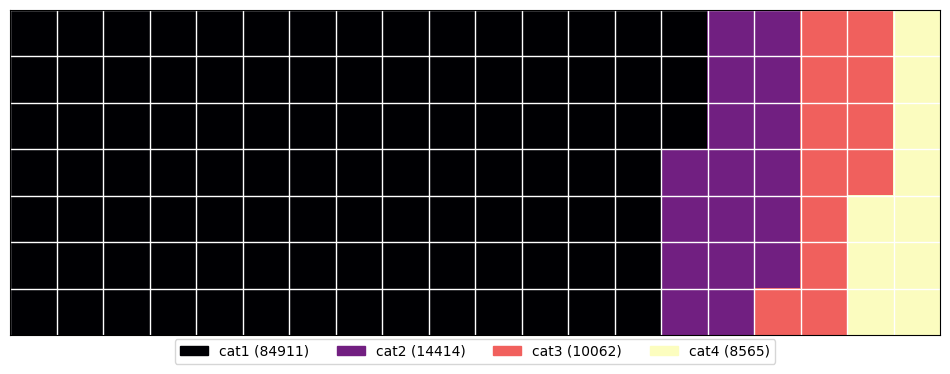

In [5]:
waffle_plot(df['categories'], df['values'], 20, 7, cmap=plt.cm.magma, 
            figsize=(12,7), legend_loc=(0.50,-0.11), legend_ncols=len(df['categories']))

In [16]:
categories = df5['categories']
cmap = plt.cm.viridis
c= ['b', 'g']

c = cmap.colors if c is None else c

In [17]:
categories = df5['categories']
cmap = plt.cm.viridis
c= ['b', 'g']


cmap = cmap.resampled(len(categories))

if c is None:

    c = [cmap(x) for x in range(len(categories))]

else:
    # If there are fewer colors than categories...
    if len(c) < len(categories):
        # Extend list c with appropriate number of colors from colormap
        c.extend([cmap(x) for x in range(len(categories))][len(c):])

    if len(c) > len(categories):
        # Cutting colour list in case we have more colours than categories
        c = c[:n_categories]

In [18]:
c

['b',
 'g',
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0)]

# Examples

In [19]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

In [20]:
def rgb_norm(r, g, b):
    """
    It is simple normalising from rgb scale (0-255)
    The formula:
    #xs = (x – min(x)) / (max(x) – min(x))
    for rgb it would be:
    #v = (v-0) / (255-0)
    """
    r = r / 255
    g = g / 255
    b = b / 255
    
    return r, g, b

In [21]:
violet = rgb_norm(47, 16,98)
pinkish = rgb_norm(138, 40, 129)
orange = rgb_norm(250, 128, 94)
yellow = rgb_norm(252, 238, 176)
blackish = rgb_norm(17, 17, 17)

blueish = rgb_norm(58, 82, 139)
green = rgb_norm(89, 199, 100)
greenish = rgb_norm(191 ,223 ,39)

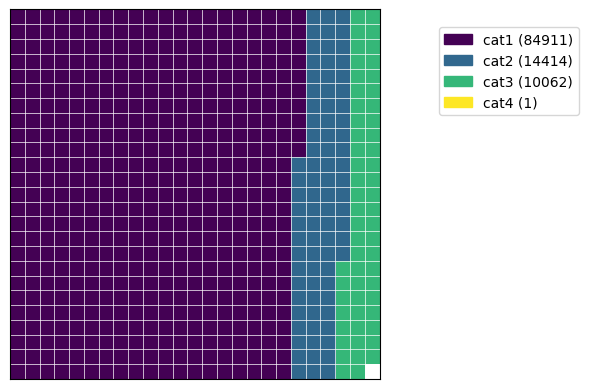

In [22]:
df5 = df.copy()
df5.loc[df5['categories'] == 'cat4', 'values'] = 1

waffle_plot(df5['categories'], df5['values'])

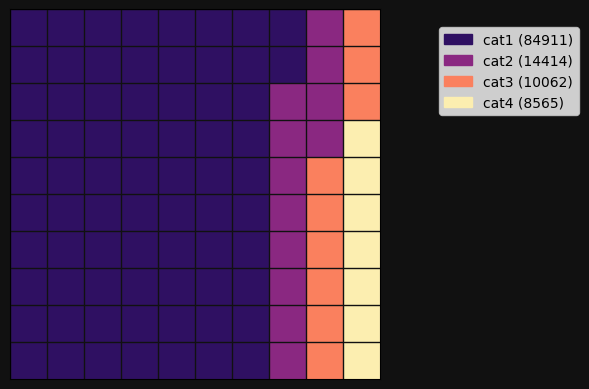

In [23]:
waffle_plot(df['categories'], df['values'], c=[violet, pinkish, orange, yellow], bc=blackish)

In [11]:
df

,categories,values
0,cat1,84911
1,cat2,14414
2,cat3,10062
3,cat4,8565


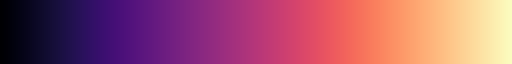

In [12]:
plt.cm.magma

In [13]:
yellow

(0.9882352941176471, 0.9333333333333333, 0.6901960784313725)

In [14]:
plt.cm.magma(255)

(0.987053, 0.991438, 0.749504, 1.0)

In [ ]:
violet = plt.cm.magma(60)
pinkish = plt.cm.magma(101)
orange = plt.cm.magma(188)
yellow = plt.cm.magma(243)

In [ ]:
blackish

In [ ]:
waffle_plot(df['categories'], df['values'], c=[violet, pinkish, orange, yellow], bc=blackish)

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, c=[violet, pinkish, orange, yellow], bc=blackish,
           figsize=(12,7), legend_ncols=len(df['categories']), legend_loc=(0.5, -0.13))

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, c=[violet, pinkish, orange, yellow], bc=blackish,
           figsize=(12,7), legend_ncols=len(df['categories']), legend_loc=(0.5, -0.13), label_p=True)

In [ ]:
plt.cm.viridis

In [ ]:
plt.cm.plasma

In [ ]:
plt.cm.cividis

In [ ]:
waffle_plot(df['categories'], df['values'])

In [ ]:
waffle_plot(df['categories'], df['values'], vertical=False)

In [ ]:
waffle_plot(df['categories'], df['values'], bc='k')

In [ ]:
# one empty value
df1=df.copy()
df1.loc[df1['categories'] == 'cat4', 'values'] = 0

waffle_plot(df1['categories'], df1['values'], label_p=True)

In [ ]:
#Only one value present
df2 = df.head(1).copy()

waffle_plot(df2['categories'], df2['values'])

In [ ]:
# Only one non-zero value
df3 = df.copy()
df3.loc[df3['categories'] != 'cat1', 'values'] = 0

waffle_plot(df3['categories'], df3['values'])

In [ ]:
df4 = df.copy()
df4['values'] = 0

waffle_plot(df4['categories'], df4['values'])

In [ ]:
df6 = df.copy()
df6.loc[df6['categories'] == 'cat4', 'values'] = 113
waffle_plot(df6['categories'], df6['values'])

In [ ]:
df6.loc[df6['categories'] == 'cat4', 'values'] = 114
waffle_plot(df6['categories'], df6['values'])

In [ ]:
# Huge disproportion in the data
df5 = df.copy()
df5.loc[df5['categories'] == 'cat4', 'values'] = 1

waffle_plot(df5['categories'], df5['values'])

In [ ]:
waffle_plot(df5['categories'], df5['values'], over_represent=True)

In [ ]:
waffle_plot(df5['categories'], df5['values'], autoscale=False, over_represent=False)

In [ ]:
waffle_plot(df['categories'], df['values'], value_sign = '£')

In [ ]:
waffle_plot(df['categories'], df['values'], value_sign = '£', label_p=True)

In [ ]:
waffle_plot(df['categories'], df['values'], value_sign = '%')

In [ ]:
waffle_plot(df5['categories'], df5['values'], figsize=(7,7), label_v=False, label_p=True, 
            legend_ncols=len(df5['categories']), legend_loc=(0.50,-0.08), bc='k')

In [ ]:
df = pd.DataFrame(columns=['categories', 'values'])

df['values'] = [25, 90, 96, 57, 59, 48]
df['categories'] = ['a', 'b','c', 'd', 'e', 'f']

waffle_plot(df['categories'], df['values'], font_c='blue', legend_loc=(1.15, 0.636))

In [ ]:
df = pd.DataFrame(columns=['categories', 'values'])

df['values'] = [1, 90, 96, 57, 59, 0]
df['categories'] = ['a', 'b','c', 'd', 'e', 'f']

waffle_plot(df['categories'], df['values'], font_c='blue', legend_loc=(1.15, 0.636))

In [ ]:
df = pd.DataFrame(columns=['categories', 'values'])

df['values'] = [1, 90, 96, 57, 59, 0]
df['categories'] = ['a', 'b','c', 'd', 'e', 'f']

waffle_plot(df['categories'], df['values'], font_c='blue', font='Arial', height=50, width=50, legend_loc=(1.15, 0.636))

In [ ]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7)

If we want to change the colormap, we can:

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, cmap=plt.cm.plasma, figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

If we pass a list of colors, those colors will be used instead:

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c', 'k'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

And if we pass too few colors, the missing colors will be taken from colormap:

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

In [ ]:
waffle_plot(df5['categories'], df5['values'], 20, 7, c=['b', 'g'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)